<a href="https://colab.research.google.com/github/ai-fast-track/timeseries/blob/master/nbs/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](images/docs.png) [timeseries package documentation](https://ai-fast-track.github.io/timeseries/)

# `timeseries` package for fastai2

> **`timeseries`** is a Timeseries Classification and Regression package for fastai2.
> It mimics the fastai2 vision module (fastai2.vision).

> This notebook is a tutorial that shows, and trains an end-to-end a timeseries dataset. 

> The dataset example is the NATOPS dataset (see description here beow).

> First, 4 different methods of creation on how to create timeseries dataloaders are presented. 

> Then, we train a model based on [Inception Time]  (https://arxiv.org/pdf/1909.04939.pdf) architecture 


## Installation
> There are may ways to install `timeseries` package. Since `timeseries` is built using `fastai2`, there are also different ways to install fastai2. We will show 2 differents ways to install them and explain the motivation behin each one of them.

### Method 1 : Editable Version
#### 1A - Installing fastai2
> Important : Only if you have not already installed `fastai2`,
install [fastai2](https://dev.fast.ai/#Installing) by following the steps described there.

#### 1B - Installing `timeseries` on a local machine
> Note : Installing an editable version of a package means that you will install a package from its corresponding github repository on your local machine. By doing so, you can pull the latest version whenever a new version is pushed.

To install `timeseries` editable package, follow the instructions here below:

```
git clone https://github.com/ai-fast-track/timeseries.git
cd timeseries
pip install -e .
```

### Method 2 : Non Editable version
> Note : Everytime you run the `!pip install git+https:// ...`, you are installing the package latest version stored on github. 

> Important : As both fastai2 and `timeseries` are still under development, this is an easy way to use them in Google Colab or any other online platform. You can also use it on your local machine.


#### 2A - Installing `fastai2` from its github repository

In [ ]:
# Run this cell to install the latest version of fastai shared on github
!pip install git+https://github.com/fastai/fastai2.git

In [ ]:
# Run this cell to install the latest version of fastcore shared on github
!pip install git+https://github.com/fastai/fastcore.git

#### 2B - Installing `timeseries` from its github repository

In [ ]:
# Run this cell to install the latest version of timeseries shared on github
!pip install git+https://github.com/ai-fast-track/timeseries.git

## `Usage`

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [ ]:
from fastai2.basics import *

In [ ]:
# hide
# Only for Windows users because symlink to `timeseries` folder is not recognized by Windows
import sys
sys.path.append("..")

In [ ]:
from timeseries.all import *

## Tutorial on timeseries package for fastai2

## Example : NATOS dataset

### Description
The data is generated by sensors on the hands, elbows, wrists and thumbs. The data are the x,y,z coordinates for each of the eight locations. The order of the data is as follows:

![](images/NATOPS.jpg)

**Right Arm vs Left Arm time series for the 'Not clear' Command ((#3) (see picture here above)**

![](images/ts-left-arm.png)
![](images/ts-right-arm.png)

### Channels (24)
| Hand                |  Elbow            | Hand               |  Elbow                |
|:------------------- |:----------------- |:------------------ |:--------------------  | 
| 0. Hand tip left, X | 6. Elbow left, X  | 12.	Wrist left, X  | 18.	Thumb left, X  |
| 1. Hand tip left, Y | 7. Elbow left, Y  | 13.	Wrist left, X  | 19.	Thumb left, X  |
| 2. Hand tip left, Z | 8. Elbow left, Z  | 14.	Wrist left, X  | 20.	Thumb left, X  |
| 3. Hand tip righ, X | 9. Elbow righ, X  | 15.	Wrist righ, X  | 21.	Thumb righ, X  |
| 4. Hand tip righ, Y | 10. Elbow righ, Y | 16.	Wrist righ, X  | 22.	Thumb righ, X  |
| 5. Hand tip righ, Z | 11. Elbow righ, Z | 17.	Wrist righ, X  | 23.	Thumb righ, X  |


### Classes (6)

The six classes are separate actions, with the following meaning:

|                   |                |                |                |                |                       |
|:----------------- |:-------------- |:-------------- |:-------------- |:-------------- |:-------------- |
| 1: I have command | 2: All clear   | 3: Not clear  | 4: Spread wings  | 5: Fold wings |6: Lock wings   |

## Downloading and unzipping a time series dataset

In [ ]:
dsname =  'NATOPS' #'NATOPS', 'LSST', 'Wine', 'Epilepsy', 'HandMovementDirection'

In [ ]:
# url = 'http://www.timeseriesclassification.com/Downloads/NATOPS.zip'
path = unzip_data(URLs_TS.NATOPS)
path

Path('/home/farid/.fastai/data/NATOPS')

## Why do I have to concatenate train and test data?
Both Train and Train dataset contains 180 samples each. We concatenate them in order to have one big dataset and then split into train and valid dataset using our own split percentage (20%, 30%, or whatever number you see fit)

In [ ]:
fname_train = f'{dsname}_TRAIN.arff'
fname_test = f'{dsname}_TEST.arff'
fnames = [path/fname_train, path/fname_test]
fnames

[Path('/home/farid/.fastai/data/NATOPS/NATOPS_TRAIN.arff'),
 Path('/home/farid/.fastai/data/NATOPS/NATOPS_TEST.arff')]

In [ ]:
data = TSData.from_arff(fnames)
print(data)

TSData:
 Datasets names (concatenated): ['NATOPS_TRAIN', 'NATOPS_TEST']
 Filenames:                     [Path('/home/farid/.fastai/data/NATOPS/NATOPS_TRAIN.arff'), Path('/home/farid/.fastai/data/NATOPS/NATOPS_TEST.arff')]
 Data shape: (360, 24, 51)
 Targets shape: (360,)
 Nb Samples: 360
 Nb Channels:           24
 Sequence Length: 51


In [ ]:
items = data.get_items()

In [ ]:
idx = 1
x1, y1 = data.x[idx],  data.y[idx]
y1

'3.0'

In [ ]:

# You can select any channel to display buy supplying a list of channels and pass it to `chs` argument
# LEFT ARM
# show_timeseries(x1, title=y1, chs=[0,1,2,6,7,8,12,13,14,18,19,20])


In [ ]:
# RIGHT ARM
# show_timeseries(x1, title=y1, chs=[3,4,5,9,10,11,15,16,17,21,22,23])

In [ ]:
# ?show_timeseries(x1, title=y1, chs=range(0,24,3)) # Only the x axis coordinates


In [ ]:
seed = 42
splits = RandomSplitter(seed=seed)(range_of(items)) #by default 80% for train split and 20% for valid split are chosen 
splits

((#288) [304,281,114,329,115,130,338,294,94,310...],
 (#72) [222,27,96,253,274,35,160,172,302,146...])

## Using `Datasets` class

### Creating a Datasets object

In [ ]:
# export
lbl_dict = dict([
    ('1.0', 'I have command'),   
    ('2.0', 'All clear'),   
    ('3.0', 'Not clear'),   
    ('4.0', 'Spread wings'),   
    ('5.0', 'Fold wings'),   
    ('6.0', 'Lock wings')]
)

In [ ]:
tfms = [[ItemGetter(0), ToTensorTS()], [ItemGetter(1), lbl_dict.get, Categorize()]]

# Create a dataset
ds = Datasets(items, tfms, splits=splits)

Not clear


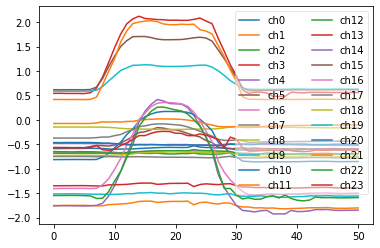

In [ ]:
ax = show_at(ds, 2, figsize=(1,1))

## Creating a `Dataloaders` object

### 1st method : using `Datasets` object

In [ ]:
bs = 128                            
# Normalize at batch time
tfm_norm = Normalize(scale_subtype = 'per_sample_per_channel', scale_range=(0, 1)) # per_sample , per_sample_per_channel
# tfm_norm = Standardize(scale_subtype = 'per_sample')
batch_tfms = [tfm_norm]

dls1 = ds.dataloaders(bs=bs, val_bs=bs * 2, after_batch=batch_tfms, num_workers=0, device=default_device()) 

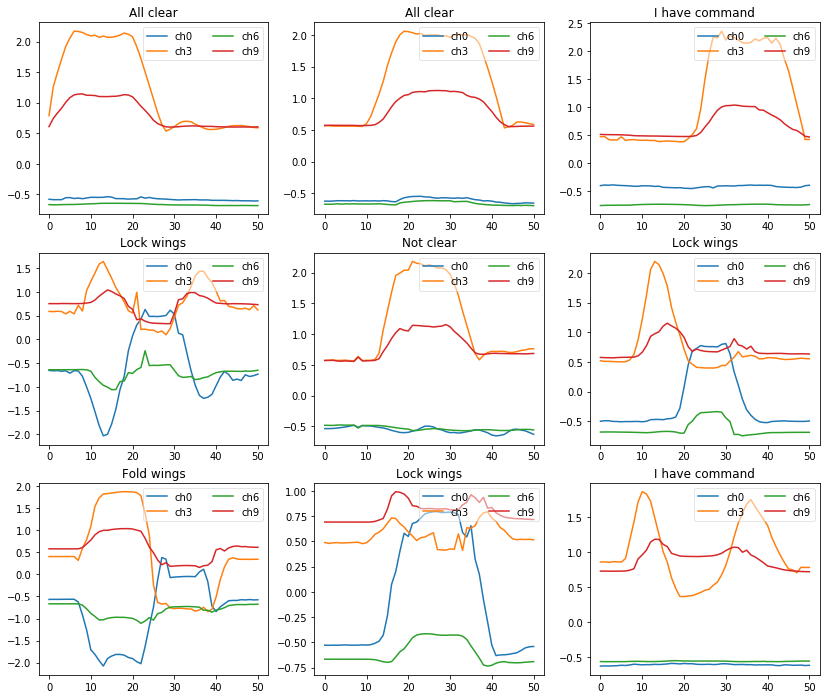

In [ ]:
dls1.show_batch(max_n=9, chs=range(0,12,3))

# Using `DataBlock` class

### 2nd method : using `DataBlock` and `DataBlock.get_items()` 

In [ ]:
tsdb = DataBlock(blocks=(TSBlock, CategoryBlock),
                   get_items=get_ts_items,
                   get_x = ItemGetter(0),
                   get_y = Pipeline([ItemGetter(1), lbl_dict.get]),
                   splitter=RandomSplitter(seed=seed),
                   batch_tfms = batch_tfms)

In [ ]:
tsdb.summary(fnames)

Setting-up type transforms pipelines
Found 360 items
2 datasets of sizes 288,72
Setting up Pipeline: ItemGetter -> ToTensorTS
Setting up Pipeline: ItemGetter -> dict.get -> Categorize

Building one sample
  Pipeline: ItemGetter -> ToTensorTS
    starting from
      ([[-0.540579 -0.54101  -0.540603 ... -0.56305  -0.566314 -0.553712]
 [-1.539567 -1.540042 -1.538992 ... -1.532014 -1.534645 -1.536015]
 [-0.608539 -0.604609 -0.607679 ... -0.593769 -0.592854 -0.599014]
 ...
 [ 0.454542  0.449924  0.453195 ...  0.480281  0.45537   0.457275]
 [-1.411445 -1.363464 -1.390869 ... -1.468123 -1.368706 -1.386574]
 [-0.473406 -0.453322 -0.463813 ... -0.440582 -0.427211 -0.435581]], 2.0)
    applying ItemGetter gives
      [[-0.540579 -0.54101  -0.540603 ... -0.56305  -0.566314 -0.553712]
 [-1.539567 -1.540042 -1.538992 ... -1.532014 -1.534645 -1.536015]
 [-0.608539 -0.604609 -0.607679 ... -0.593769 -0.592854 -0.599014]
 ...
 [ 0.454542  0.449924  0.453195 ...  0.480281  0.45537   0.457275]
 [-1.41144

In [ ]:
# num_workers=0 is Microsoft Windows
dls2 = tsdb.dataloaders(fnames, num_workers=0, device=default_device())

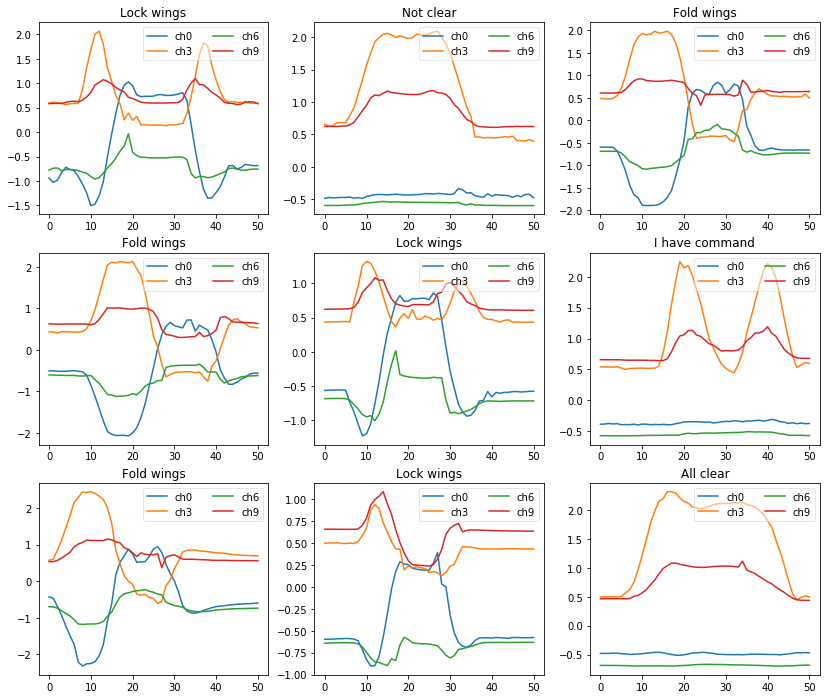

In [ ]:
dls2.show_batch(max_n=9, chs=range(0,12,3))

### 3rd method : using `DataBlock` and passing `items` object to the `DataBlock.dataloaders()`

In [ ]:
# getters = [ItemGetter(0), ItemGetter(1)] 
tsdb = DataBlock(blocks=(TSBlock, CategoryBlock),
                   get_x = ItemGetter(0),
                   get_y = Pipeline([ItemGetter(1), lbl_dict.get]),
                   splitter=RandomSplitter(seed=seed))

In [ ]:
dls3 = tsdb.dataloaders(data.get_items(), batch_tfms=batch_tfms, num_workers=0, device=default_device())

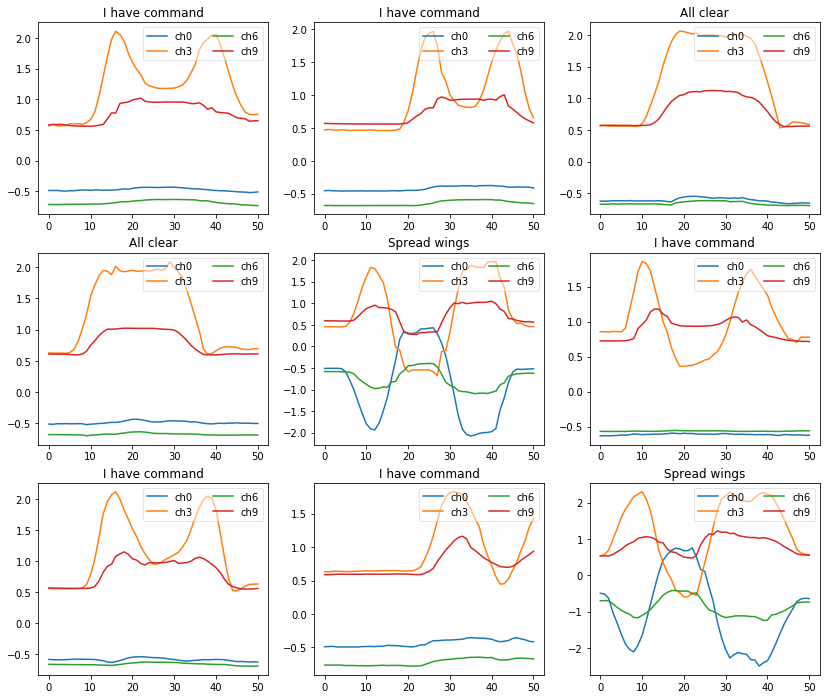

In [ ]:
dls3.show_batch(max_n=9, chs=range(0,12,3))

### 4th method : using `TSDataLoaders` class and `TSDataLoaders.from_files()`

In [ ]:
dls4 = TSDataLoaders.from_files(fnames=fnames, path=path, batch_tfms=batch_tfms, lbl_dict=lbl_dict, num_workers=0, device=default_device())

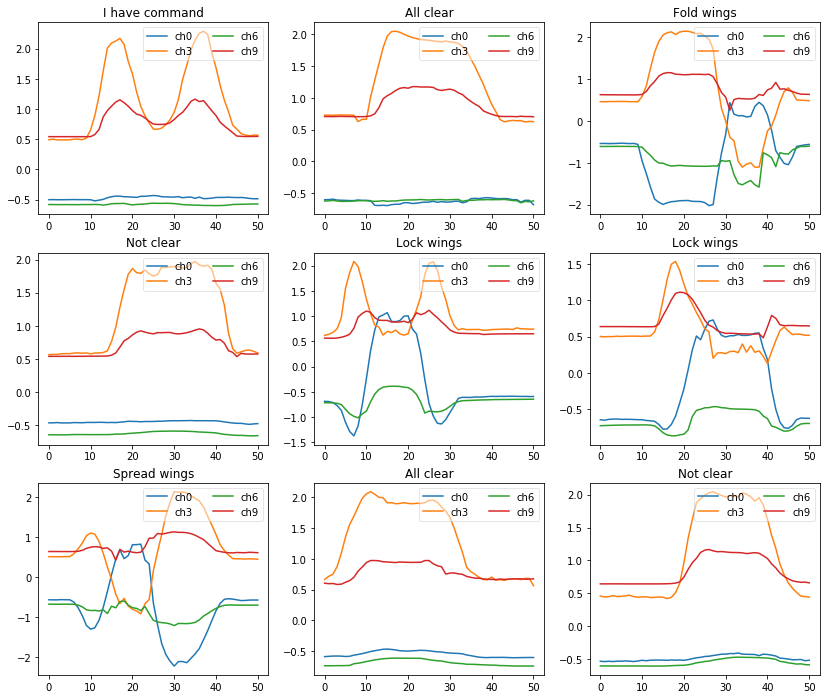

In [ ]:
dls4.show_batch(max_n=9, chs=range(0,12,3))

## Training a Model

In [ ]:
# Number of channels (i.e. dimensions in ARFF and TS files jargon)
c_in = get_n_channels(dls2.train) # data.n_channels
# Number of classes
c_out= dls2.c 
c_in,c_out

(24, 6)

### Creating a model

In [ ]:
model = inception_time(c_in, c_out).to(device=default_device())
model

Sequential(
  (0): SequentialEx(
    (layers): ModuleList(
      (0): InceptionModule(
        (convs): ModuleList(
          (0): Conv1d(24, 32, kernel_size=(39,), stride=(1,), padding=(19,), bias=False)
          (1): Conv1d(24, 32, kernel_size=(19,), stride=(1,), padding=(9,), bias=False)
          (2): Conv1d(24, 32, kernel_size=(9,), stride=(1,), padding=(4,), bias=False)
        )
        (maxpool_bottleneck): Sequential(
          (0): MaxPool1d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
          (1): Conv1d(24, 32, kernel_size=(1,), stride=(1,), bias=False)
        )
        (bn_relu): Sequential(
          (0): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): ReLU()
        )
      )
    )
  )
  (1): SequentialEx(
    (layers): ModuleList(
      (0): InceptionModule(
        (bottleneck): Conv1d(128, 32, kernel_size=(1,), stride=(1,))
        (convs): ModuleList(
          (0): Conv1d(32, 32, kernel_size=(39

### Creating a Learner object

In [ ]:
# opt_func = partial(Adam, lr=3e-3, wd=0.01)
#Or use Ranger
def opt_func(p, lr=slice(3e-3)): return Lookahead(RAdam(p, lr=lr, mom=0.95, wd=0.01)) 

In [ ]:
#Learner    
loss_func = LabelSmoothingCrossEntropy() 
learn = Learner(dls2, model, opt_func=opt_func, loss_func=loss_func, metrics=accuracy)

print(learn.summary())

Sequential (Input shape: ['64 x 24 x 51'])
Layer (type)         Output Shape         Param #    Trainable 
Conv1d               64 x 32 x 51         29,952     True      
________________________________________________________________
Conv1d               64 x 32 x 51         14,592     True      
________________________________________________________________
Conv1d               64 x 32 x 51         6,912      True      
________________________________________________________________
MaxPool1d            64 x 24 x 51         0          False     
________________________________________________________________
Conv1d               64 x 32 x 51         768        True      
________________________________________________________________
BatchNorm1d          64 x 128 x 51        256        True      
________________________________________________________________
ReLU                 64 x 128 x 51        0          False     
_______________________________________________________

### LR find 

(0.05248074531555176, 0.0008317637839354575)

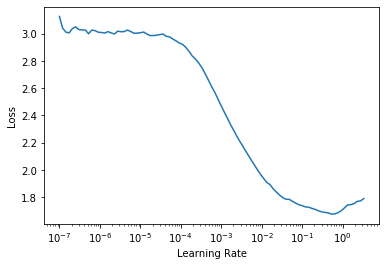

In [ ]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

### Train

In [ ]:
learn.fit_one_cycle(25, lr_max=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.944844,1.795526,0.222222,00:01
1,2.927313,1.799789,0.222222,00:02
2,2.780479,1.805888,0.222222,00:01
3,2.563461,1.810662,0.222222,00:01
4,2.274817,1.819216,0.194444,00:01
5,1.995963,1.831101,0.111111,00:01
6,1.775486,1.739081,0.250000,00:01
7,1.598613,1.656564,0.319444,00:01
8,1.455424,1.456199,0.486111,00:02
9,1.338929,1.178829,0.666667,00:02


### Ploting the loss function

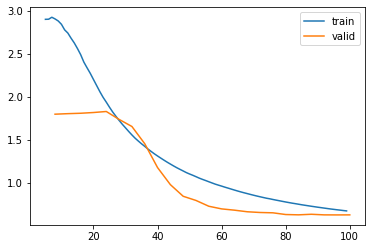

In [ ]:
learn.recorder.plot_loss()

### Showing the results

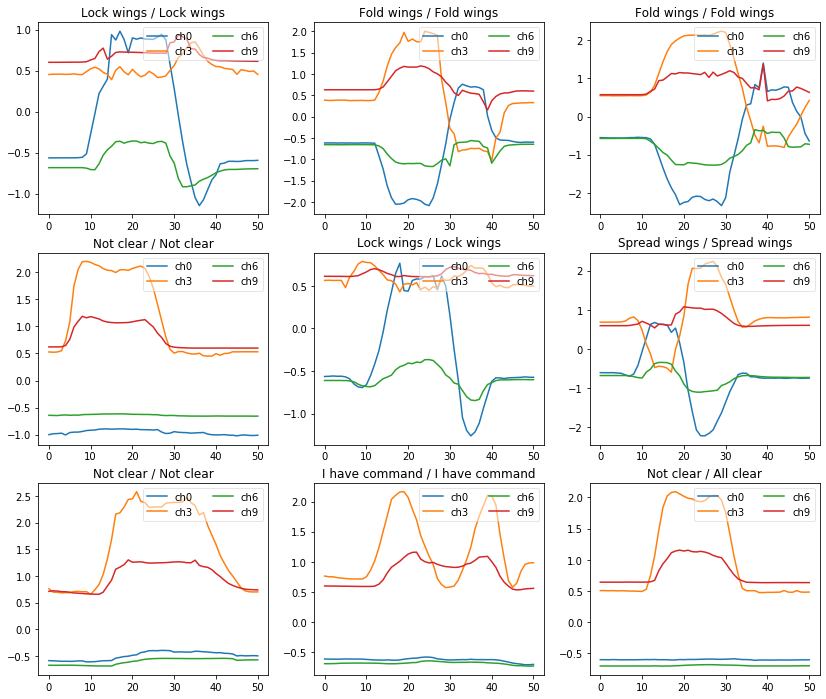

In [ ]:
learn.show_results(max_n=9, chs=range(0,12,3))

### Showing the confusion matrix

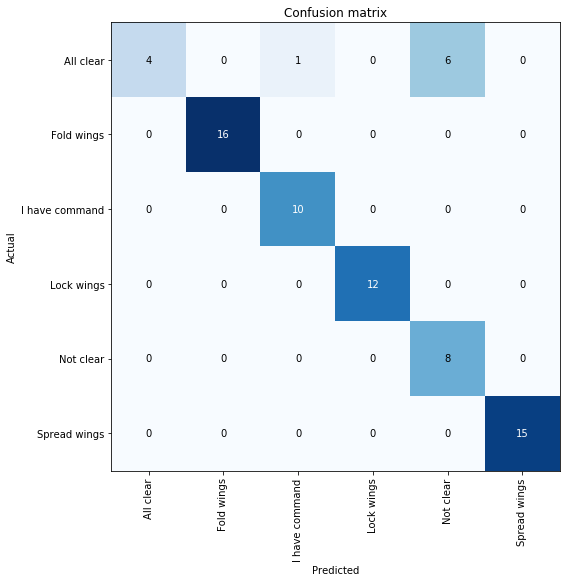

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,8))

![](images/tree.jpg)